In [1]:
import numpy as np
import pandas as pd

In [28]:
from glob import glob

In [106]:
class PlotTrainInfo:
  def __init__ (self, 
                root,
                plot_acc=False,
                plot_val = False,
                rev = True):
    self.root = root
    self.plot_acc = plot_acc
    self.plot_val = plot_val
    self.rev = rev

  def read_info (self):
    return [pd.read_json(path) for path in sorted(glob(self.root), reverse=self.rev)]


  def plot_all(self,
               counter_type,
               title_list,
               save,
               info_type='acc',
               val=False,
               setting='paper setting'):
    all_info = self.read_info()
    iterations = [info[counter_type].values for info in all_info]
    train_accs = [info[f'train_{info_type}'].values for info in all_info]
    if val:
      val_accs = [info[f'val_{info_type}'].values for info in all_info]

    fig = plt.figure(figsize=(13, 13))
    fig.suptitle(f'Emotion classification {info_type} per epoch for train/test split in {setting}', fontsize=12)

    rows = 2
    columns = 2
    out_index = 0
    model_index=0
    for i in range(1, columns*rows +1):
      
      fig.add_subplot(rows, columns, i)
      plt.title(title_list[i-1], fontsize=10)
      plt.xlabel(counter_type)
      plt.ylabel(info_type)
      plt.plot(train_accs[i-1], label=f'train {info_type}')
      if val:
        plt.plot(val_accs[i-1], label=f'val {info_type}')

      plt.legend()
      #self.plot_info(info_type='loss')
      #plt.axis('off')
    plt.show()
    fig.savefig(save)

    
    

    

In [88]:
import matplotlib.pyplot as plt

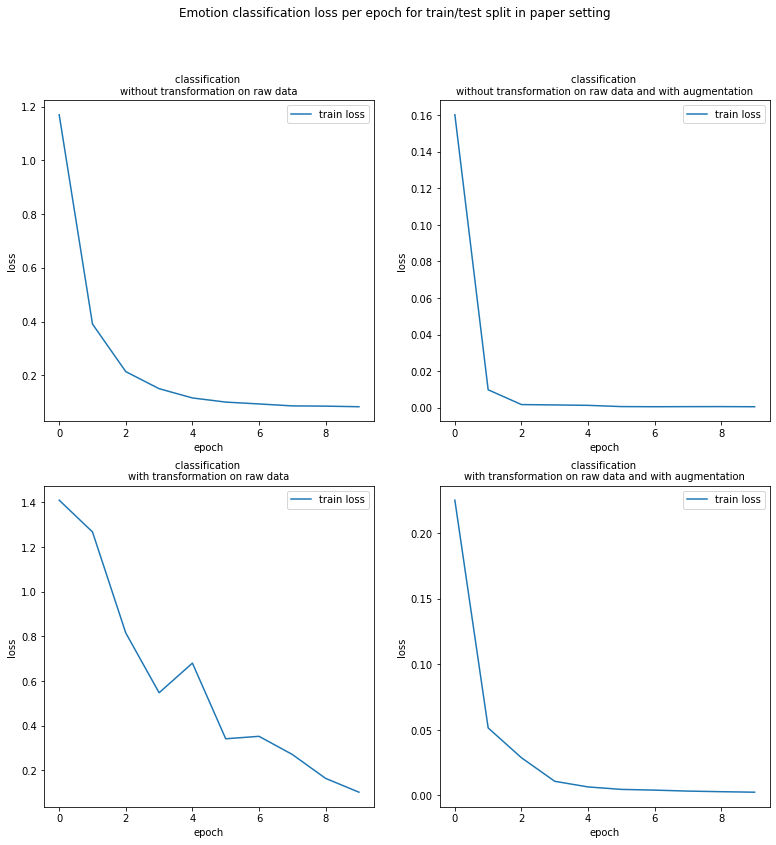

In [111]:

path = '/content/training_info*.json'
KDEF = PlotTrainInfo(root=path, rev=True)
title_list = ['classification \nwithout transformation on raw data',
              'classification \nwithout transformation on raw data and with augmentation',
              'classification \nwith transformation on raw data',
              'classification \nwith transformation on raw data and with augmentation']
KDEF.plot_all(counter_type='epoch', title_list = title_list, val=False, setting='paper setting', save='paper_loss.png', info_type='loss')

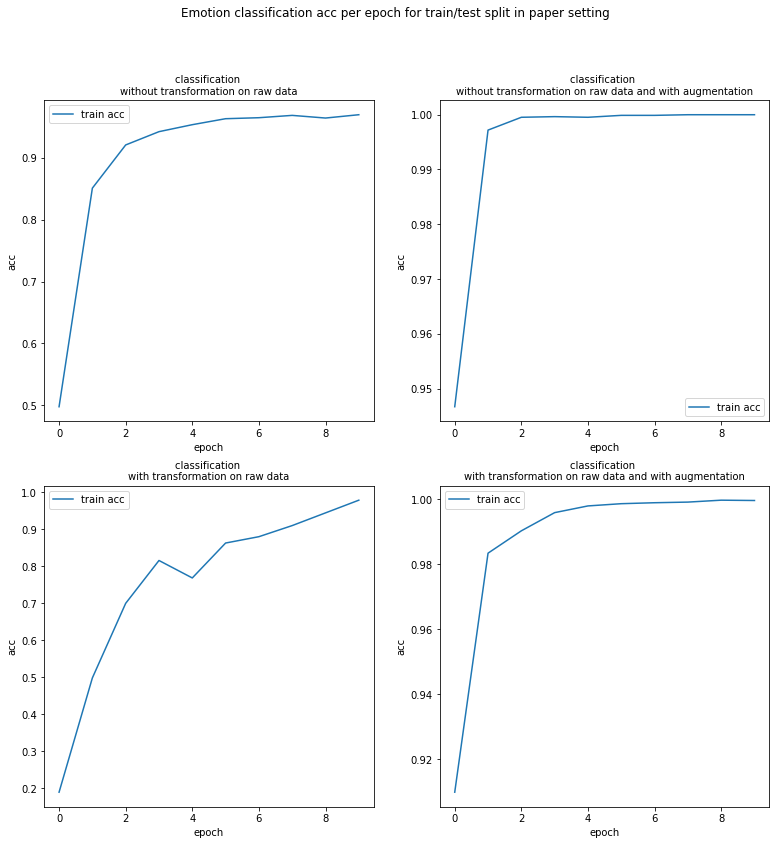

In [112]:

path = '/content/training_info*.json'
KDEF = PlotTrainInfo(root=path, rev=True)
title_list = ['classification \nwithout transformation on raw data',
              'classification \nwithout transformation on raw data and with augmentation',
              'classification \nwith transformation on raw data',
              'classification \nwith transformation on raw data and with augmentation']
KDEF.plot_all(counter_type='epoch', title_list = title_list, val=False, setting='paper setting', save='paper_acc.png', info_type='acc')

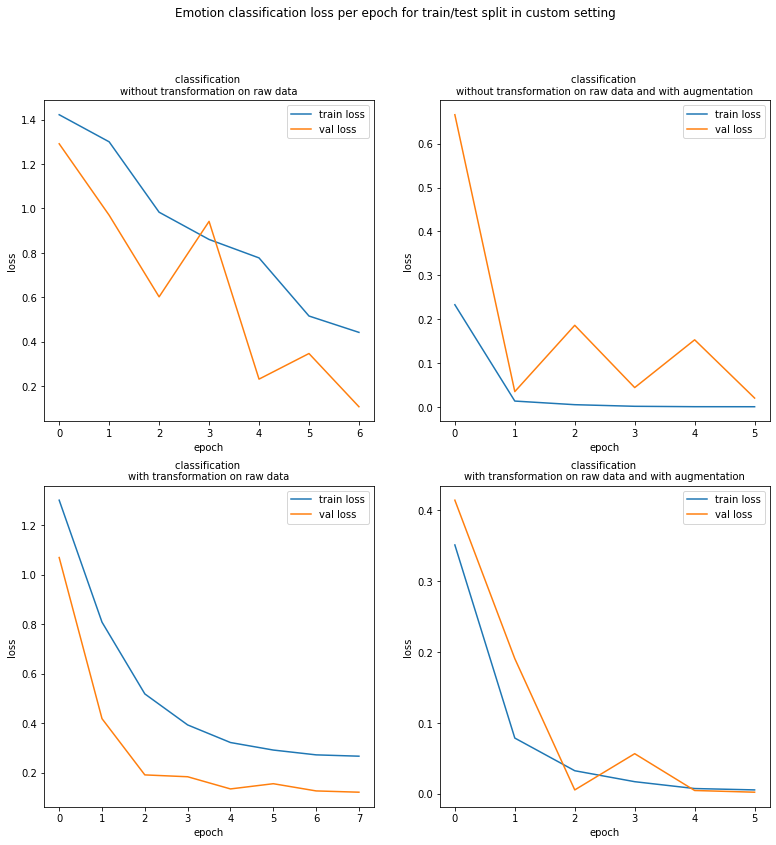

In [108]:

path = '/content/training_info*.json'
KDEF = PlotTrainInfo(root=path, rev=False)
title_list = ['classification \nwithout transformation on raw data',
              'classification \nwithout transformation on raw data and with augmentation',
              'classification \nwith transformation on raw data',
              'classification \nwith transformation on raw data and with augmentation']
KDEF.plot_all(counter_type='epoch', title_list = title_list, val=True, setting='custom setting', save='custom_loss.png', info_type='loss')

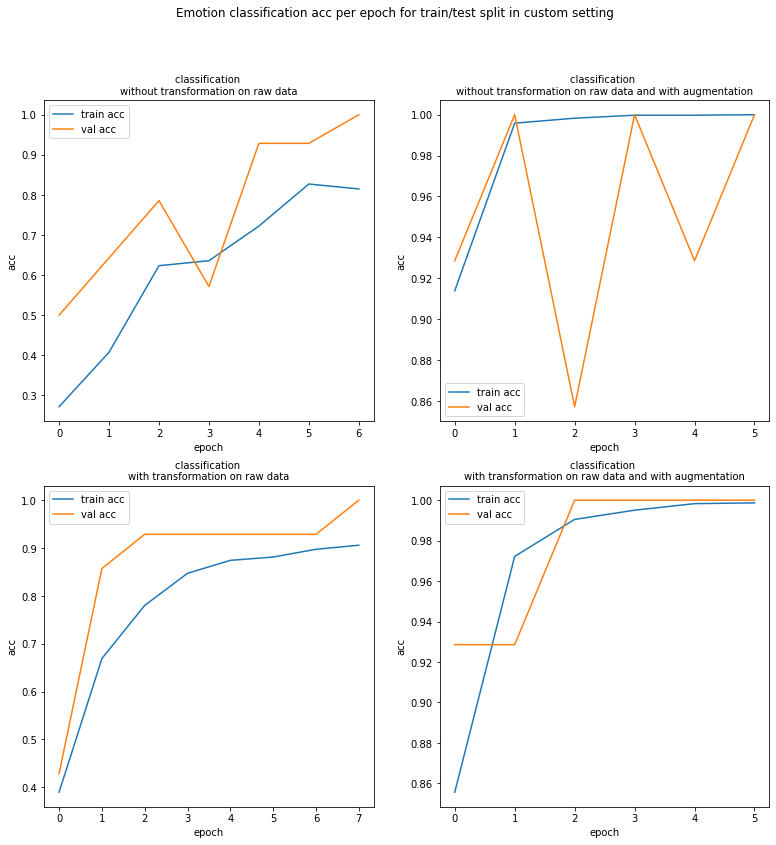

In [109]:

path = '/content/training_info*.json'
KDEF = PlotTrainInfo(root=path, rev=False)
title_list = ['classification \nwithout transformation on raw data',
              'classification \nwithout transformation on raw data and with augmentation',
              'classification \nwith transformation on raw data',
              'classification \nwith transformation on raw data and with augmentation']
KDEF.plot_all(counter_type='epoch', title_list = title_list, val=True, setting='custom setting', save='custom_acc.png', info_type='acc')